<a href="https://colab.research.google.com/github/matusoff/ML_models/blob/main/LinearReg__HypothesisTestingPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Hypothesis testing with Python

In the dataset each row corresponds to an independent marketing promotion, where business uses TV, social media, radio, and influencer promotions to increase sales. We will answer the question if sales are significantly different among various TV and influencer promotion types, using ANOVA test to determine if there is a statistically significant difference in sales among groups. This includes:

* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs

The features in the data are:

* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

Dataset = https://drive.google.com/file/d/1BB4EXv4g7UjYMzcDZOlymLno4JuQX1O0/view?usp=drive_link

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv('/content/sample_data/marketing_sales_data.csv')

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


<Axes: xlabel='TV', ylabel='Sales'>

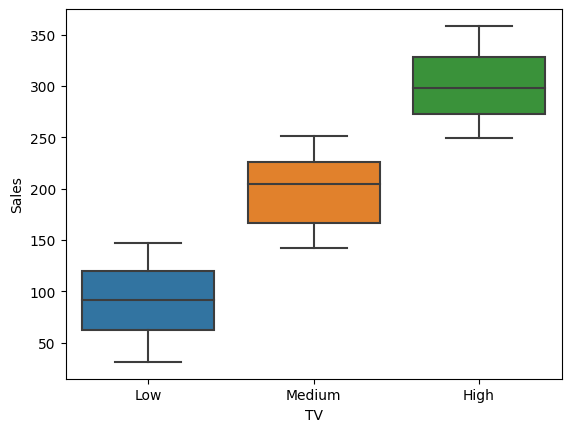

In [3]:
# Create a boxplot with TV and Sales.
sns.boxplot(x=data["TV"], y=data["Sales"], data=data)

<Axes: xlabel='Influencer', ylabel='Sales'>

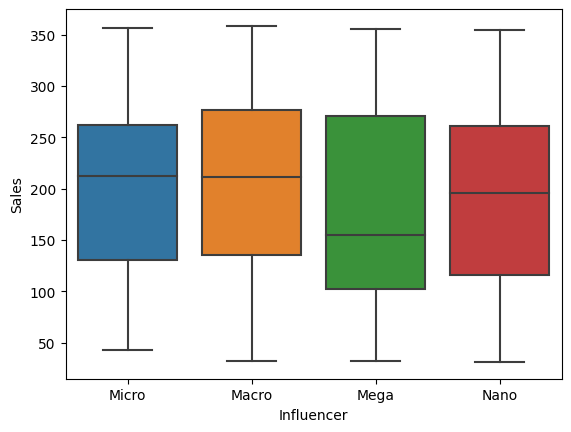

In [4]:
# Create a boxplot with Influencer and Sales.
sns.boxplot(x=data["Influencer"], y=data["Sales"], data=data)

In [5]:
# Drop rows that contain missing data and update the DataFrame.
data_final = data.dropna(axis=0)
data = data_final


# Confirm the data contains no missing values.
print(data.isna().sum())
print(f"Number of missing values in rows: {data.isnull().any(axis=1).sum()}")
print(f"Number of missing values in collumns: {data.isnull().any(axis=0).sum()}")

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64
Number of missing values in rows: 0
Number of missing values in collumns: 0


In [6]:
# Define the OLS formula.
ols_formula = 'Sales ~ C(TV)'


# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)


# Fit the model.
model = OLS.fit()


# Save the results summary.
results = model.summary()


# the model results.
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Fri, 12 Jan 2024   Prob (F-statistic):          8.81e-256
Time:                        21:26:45   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

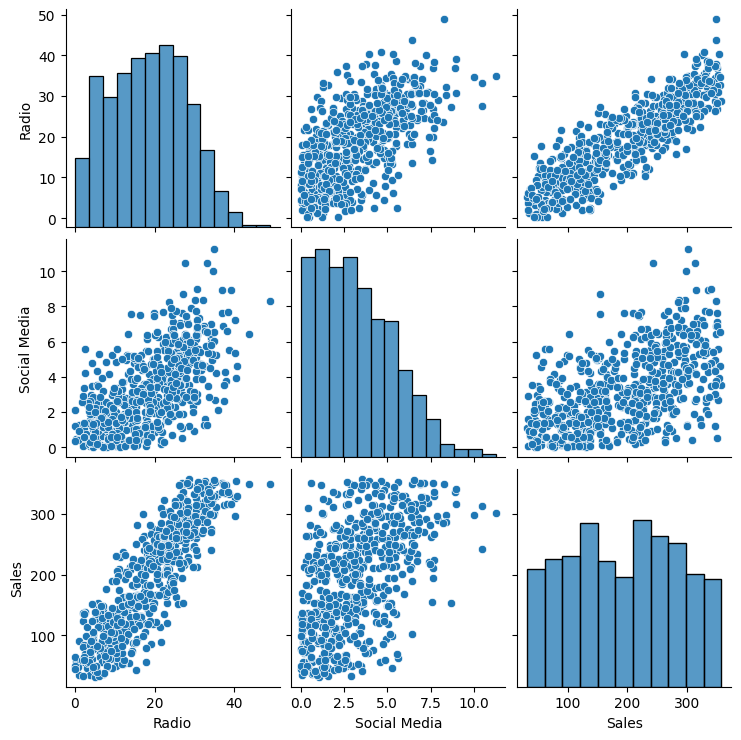

In [7]:
sns.pairplot(data)

##Check model assumptions

Text(0.5, 1.0, 'Q-Q plot of Residuals')

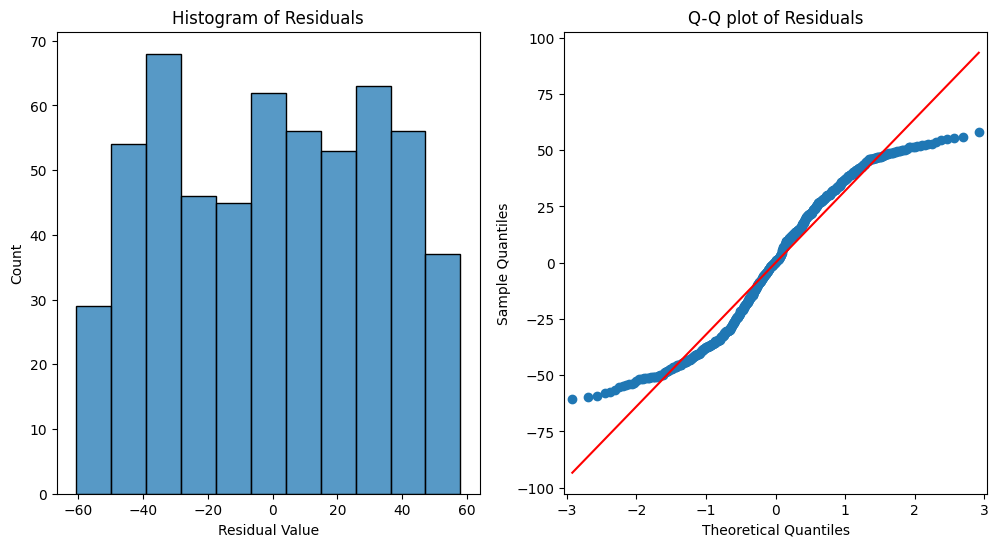

In [8]:
# Calculate the residuals.

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (12,6))

# Create a histogram with the residuals.
sns.histplot(residuals,ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals.
sm.qqplot(model.resid, line = 's', ax=axes[1])
axes[1].set_title("Q-Q plot of Residuals")

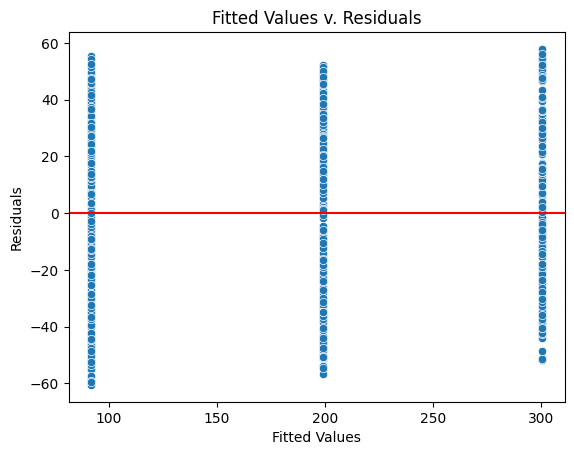

In [9]:
# Create a scatter plot with the fitted values from the model and the residuals.

model.fittedvalues


# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
# Set the x-axis label.
fig.set_xlabel("Fitted Values")
# Set the y-axis label.
fig.set_ylabel("Residuals")
# Set the title.
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0, color='red')

##Results and evaluation

In [10]:
# Display the model results summary.

results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Fri, 12 Jan 2024   Prob (F-statistic):          8.81e-256
Time:                        21:26:45   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Create an one-way ANOVA table for the fit model.

sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


In [12]:
# Perform the Tukey's HSD post hoc test.

from statsmodels.stats.multicomp import pairwise_tukeyhsd

#Run Tukey's HSD post hoc test for one-way ANOVA
tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["TV"], alpha = 0.05)

# Get results (pairwise comparisons)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.0,-216.6367,-200.9898,True
High,Medium,-101.5061,0.0,-109.3202,-93.6921,True
Low,Medium,107.3072,0.0,99.7066,114.9077,True
